# Домашнее задание

# 1 - Уменьшение палитры изображения (суммарно 6 баллов)
Для <a href='https://thumbs.dreamstime.com/x/two-lorikeet-birds-2293918.jpg'> картинки </a> нужно уменьшить число цветов в палитре.

Для этого нужно выделить **кластеры в пространстве RGB**, объекты соответствуют пикселям изображения. После выделения кластеров, все пиксели, отнесенные в один кластер, заполняются одним цветом; этот цвет может быть центроидом соответствующего кластера, медианным цветом по кластеру.

Попробуйте различные алгоритмы кластеризации:

* KMeans
* DBSCAN
* AgglomerativeClustering

Рассмотрите число кластеров K = 2, 3, 10, 20 (в алгоритмах, где есть такой гиперпараметр).

Для различных кластеризаций оцените и сравните потери от уменьшения цветов при помощи метрики 
<a href='http://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.compare_ssim'> SSIM </a>. Какой способ оказался лучшим?

Задание оценивает в 5 баллов.

Еще 1 балл даётся за запуск алгоритма на выбранных вами картинках - на них результат должен получиться красивым.

Вот вам вспомогательные функции для считывания и вывода изображений:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 # нужно поставить себе cv2 через conda install opencv

def draw_picture(image, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.show()

img - это обычный трехмерный массив цветов пикселей, где две первые координаты - это координаты каждого пикселя, и третья обозначает R, G или B.

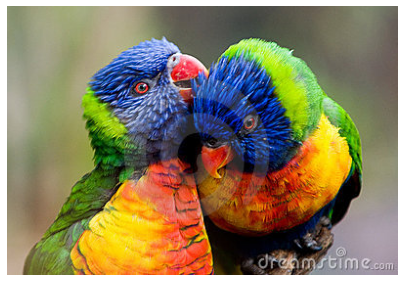

In [2]:
img = cv2.imread('birds.jpg') # считать картинку
draw_picture(img) # нарисовать картинку

In [3]:
print(img.shape) # сам img - это обычный трехмерный массив 275 x 400 x 3
# вам скорее все кстати понадобится сделать reshape, чтобы перейти от 275x400 к одномерному массиву пикселей
flat_img = img.reshape(-1, 3)
flat_img.shape

(275, 400, 3)


(110000, 3)

In [7]:
from skimage.metrics import structural_similarity as ssim
from sklearn.cluster import KMeans, DBSCAN

In [5]:
def median_color(cluster, arr, image):
  rgb = [([], [], []) for _ in range(cluster)]

  for i, elem in enumerate(arr):
    rgb[elem][0].append(image[i][0])
    rgb[elem][1].append(image[i][1])
    rgb[elem][2].append(image[i][2])

  rgb = np.array(rgb)
  colors = []
  for i in range(cluster):
    colors.append([int(np.median(rgb[i][0])),
                   int(np.median(rgb[i][1])),
                   int(np.median(rgb[i][2]))])

  final_image = []
  for elem in arr:
    final_image.append(colors[elem])

  return np.array(final_image)

In [4]:
import warnings
warnings.filterwarnings('ignore')

SSIM: 0.55


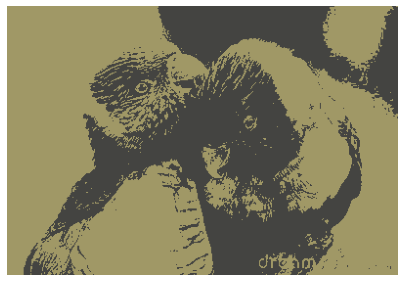

SSIM: 0.56


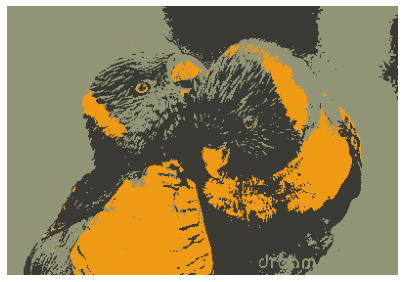

SSIM: 0.66


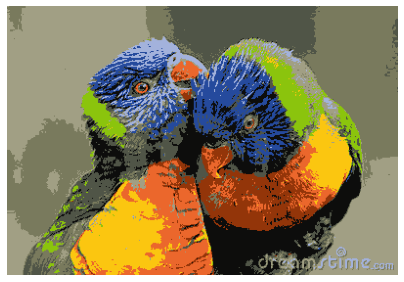

SSIM: 0.73


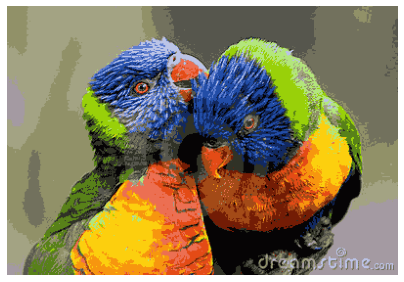

In [33]:
for n in [2, 3, 10, 20]:
  kmeans = KMeans(init='random', n_clusters=n, n_init=10, random_state=42)
  flat_result = kmeans.fit_predict(flat_img)

  result_image = median_color(n, flat_result, flat_img)
  print(f'SSIM: {ssim(flat_img, result_image, multichannel=True):.2f}')
  result_image = result_image.reshape(275, 400, 3)
  draw_picture(result_image)

SSIM : 0.51
Best epsilon=5


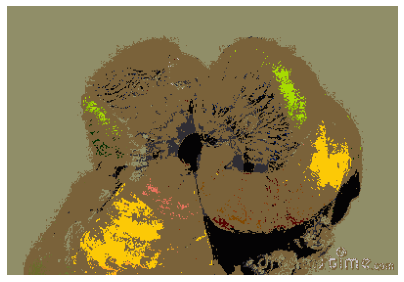

In [12]:
best = -1

for n in [30, 40, 50, 60, 70, 80, 90, 100]:
  for e in [1, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7]:
    dbscan = DBSCAN(eps=e, min_samples=40)
    flat_result = dbscan.fit_predict(flat_img)

    n = np.unique(flat_result).size

    result_image = median_color(n, flat_result, flat_img)
    metric = ssim(flat_img, result_image, multichannel=True)
    if metric >= best:
      best = metric
      params = e
      best_img = result_image.reshape(275, 400, 3) 

print(f'SSIM : {best:.2f}')
print(f'Best epsilon={params}')
draw_picture(best_img)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

for n in [2, 3, 10]:
  clustering = AgglomerativeClustering(n_clusters=n, linkage='average')
  flat_result = clustering.fit_predict(flat_img)

  result_image = median_color(n, flat_result, flat_img)
  print(ssim(flat_img, result_image, multichannel=True))
  result_image = result_image.reshape(275, 400, 3)
  draw_picture(result_image)

Мои 32гб оперативы не выдерживают Agglomerative Clustering

Самым крутым алгоритмом в данной задаче оказался KMeans, DBSCAN вывел непонятное месиво, а Agglomerative Clustering демонстративно насмехнулся на 32 гигабайтами оперативы

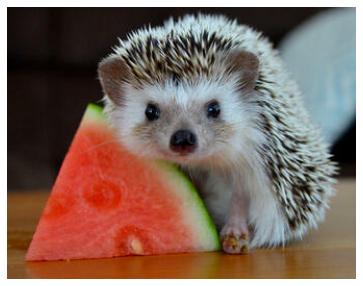

In [96]:
img = cv2.imread('hedgehog.jpeg')
draw_picture(img)

In [97]:
img.shape

(261, 335, 3)

In [98]:
flat_img = img.reshape(-1, 3)
flat_img.shape

(87435, 3)

SSIM: 0.8033308639252095


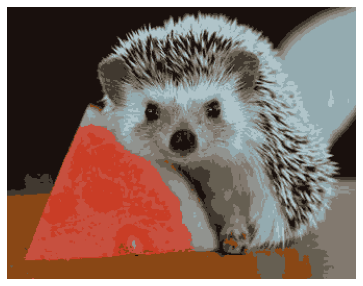

SSIM: 0.8483481521807438


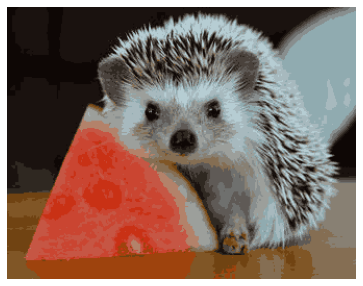

In [99]:
for clusters in [10, 20]:
    kmeans = KMeans(init='random', n_clusters=clusters, n_init=10, random_state=42)
    flat_result = kmeans.fit_predict(flat_img)

    result_image = median_color(clusters, flat_result, flat_img)
    print(f'SSIM: {ssim(flat_img, result_image, multichannel=True)}')
    result_image = result_image.reshape(261, 335, 3)
    draw_picture(result_image)

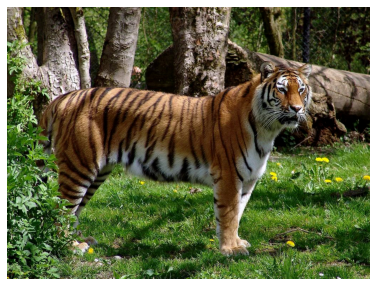

(1200, 1600, 3)


In [2]:
img = cv2.imread('tiger.jpg')
draw_picture(img)

print(img.shape)
flat_img = img.reshape(-1, 3)

SSIM: 0.7771679169927023


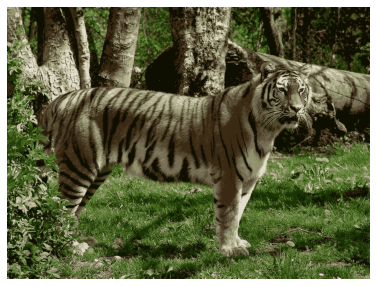

SSIM: 0.8351787789205413


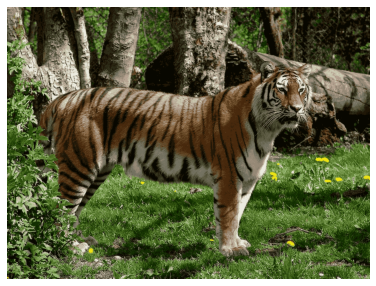

In [9]:
for clusters in [10, 20]:
    kmeans = KMeans(init='random', n_clusters=clusters, n_init=10, random_state=42)
    flat_result = kmeans.fit_predict(flat_img)

    result_image = median_color(clusters, flat_result, flat_img)
    print(f'SSIM: {ssim(flat_img, result_image, multichannel=True)}')
    result_image = result_image.reshape(1200, 1600, 3)
    draw_picture(result_image)

# 2 - Уменьшение размерности помогает классификации лиц (суммарно 6 баллов)

Используя методы уменьшения размерности признаков, решите с максимальным **accuracy** задачу классификации лиц знаменитостей (датасет старый, неудивительно, если вы из всех знаменитостей будете знать только Буша и Шварценнегера).

Попробуйте добиться максимального accuracy (2 балла)
* без уменьшения размерности
* с уменьшением размерности

Возможно без уменьшения размерности у вас даже просто не получится дождаться времени работы на 11750 признаках. Я слышал у кого-то получилось, у меня нет.

Сравните ваш результат с константным предсказанием "всегда самый популярный класс". Делает ли ваша модель какой-то значительный прогресс? (1 балл)

Нарисуйте несколько лиц, на которых ваш алгоритм ошибся, подпишите правильный ответ и ваш ответ. (1 балл)

Напишите, каким алгоритмом вы воспользовались (PCA или TSNE), почему не другим? Обоснуйте ответ. (1 балл)

Визуализируйте датасет на плоскости. Подпишите несколько самых больших классов именами людей. Чем вы воспользуетесь, PCA или TSNE? Обоснуйте ответ (1 балл)

Скачивание данных и вспомогательная функция визуализации лиц уже есть:

In [11]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=30, resize=1.0)
# эту строчку менять нельзя, ресайзить нельзя

In [12]:
from sklearn.model_selection import train_test_split
X = lfw_people.data
y = lfw_people.target
names = lfw_people.target_names

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=42)
# эту строчку тоже менять нельзя'

In [14]:
X.shape # 2370 лиц, каждый из них представляется вектором размера 11750

(2370, 11750)

In [15]:
y.shape

(2370,)

In [16]:
names[8] # в y лежат номера, а names переводит номер в имя

'George W Bush'

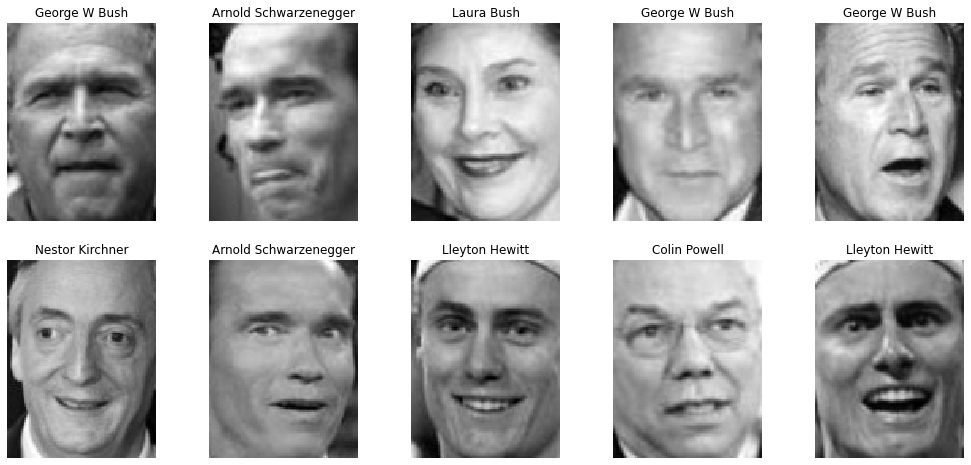

In [17]:
import matplotlib.pyplot as plt
def plot_image(image_id):
    # функция рисует изображение номер image_id
    plt.title(names[y[image_id]])
    plt.imshow(255 - lfw_people['images'][image_id], cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for index, example_id in enumerate(image_ids):
        plt.subplot(nrows, ncols, index + 1)
        plot_image(example_id)
        plt.axis('off')

plot_grid(range(10), nrows=2, ncols=5)# первые 10 лиц

In [18]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyClassifier

from sklearn.metrics import accuracy_score

log_reg = LogisticRegression().fit(X_train, y_train)
knn = KNeighborsClassifier().fit(X_train, y_train)
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)

In [19]:
log_pred = log_reg.predict(X_test)
knn_pred = knn.predict(X_test)
dummy_pred = dummy.predict(X_test)

In [20]:
print(f'Accuracy LogReg: {accuracy_score(y_test, log_pred):.2f}')
print(f'Accuracy KNN: {accuracy_score(y_test, knn_pred):.2f}')
print(f'Accuracy Dummy: {accuracy_score(y_test, dummy_pred):.2f}')

Accuracy LogReg: 0.67
Accuracy KNN: 0.42
Accuracy Dummy: 0.24


Без уменьшения размерности LogReg гораздо лучше константы

Буду юзать LogReg, т.к он самый крутой😎

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
svd = TruncatedSVD(n_components=3)
pca = PCA(n_components=3)
tSNE = TSNE(n_components=3, n_iter=500)

X_svd_3 = svd.fit_transform(X)
X_pca_3 = pca.fit_transform(X)
X_tsne_3 = tSNE.fit_transform(X)

print(f'3D-SVD accuracy: {cross_val_score(LogisticRegression(), X_svd_3, y, scoring="accuracy").mean():.5f}')
print(f'3D-PCA accuracy: {cross_val_score(LogisticRegression(), X_pca_3, y, scoring="accuracy").mean():.5f}')
print(f'3D-TSNE accuracy: {cross_val_score(LogisticRegression(), X_tsne_3, y, scoring="accuracy").mean():.5f}')

3D-SVD accuracy: 0.22827
3D-PCA accuracy: 0.23376
3D-TSNE accuracy: 0.22068


Сдал ЕГЭ по ухудшению результата почти в 2 раза😎 и достиг константы

In [23]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


def get_name(value):
  return names[value]


def draw_scatter_3d(data):
  df = pd.DataFrame(data)
  df['Target'] = y
  df['Target'] = df['Target'].apply(get_name)

  fig = px.scatter_3d(df, x=0, y=1, z=2, color='Target')
  fig.show()

def draw_scatter_2d(data):
  df = pd.DataFrame(data)
  df['Target'] = y
  df['Target'] = df['Target'].apply(get_name)

  fig = px.scatter(df, x=0, y=1, color='Target')
  fig.show()

In [24]:
draw_scatter_3d(X_tsne_3)

In [25]:
draw_scatter_3d(X_pca_3)

3D T-SNE немного неинформативен, но PCA немного лучше

Попробую 2D

In [26]:
pca = PCA(n_components=2)
tSNE = TSNE(n_components=2, n_iter=500)

X_pca_2 = pca.fit_transform(X)
X_tsne_2 = tSNE.fit_transform(X)

In [27]:
draw_scatter_2d(X_tsne_2)

In [28]:
draw_scatter_2d(X_pca_2)

Нууу, помогло не сильно

Лучшая размерность: 2231, accuracy: 0.7000


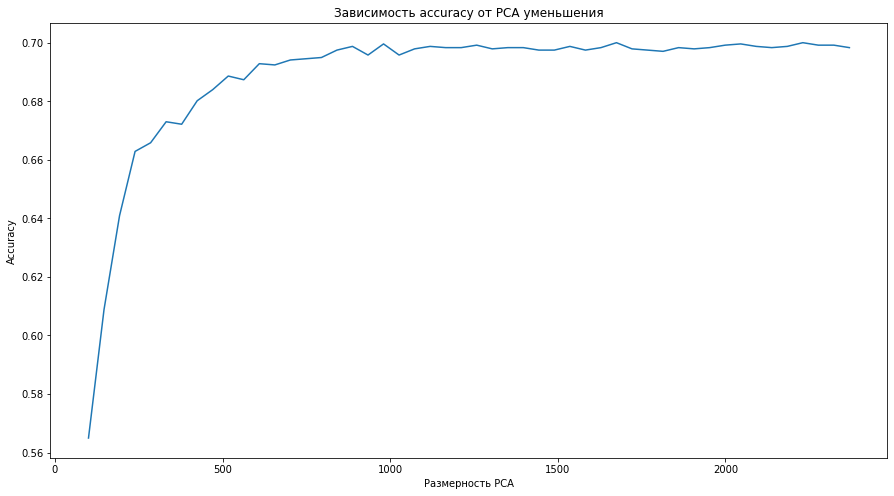

In [14]:
import numpy as np

components = np.linspace(100, 2370, 50)
results = []

# TSNE я не буду использовать, т.к он уменьшает только до размерности 3
# А SVD показывает немного худшие результаты относительно PCA, поэтому я выбираю PCA
for n in components:
  pca = PCA(n_components=int(n))
  X_shorten = pca.fit_transform(X)
  results.append((n,  cross_val_score(LogisticRegression(), X_shorten, y, scoring='accuracy').mean() ))

results = np.array(results)
ind = np.argmax(results[:, 1])
print(f'Лучшая размерность: {int(results[ind, 0])}, accuracy: {results[ind, 1]:.4f}')


plt.figure(figsize=(15, 8))
plt.plot(results[:, 0], results[:, 1])
plt.title('Зависимость accuracy от PCA уменьшения')
plt.xlabel('Размерность PCA')
plt.ylabel('Accuracy')
plt.show()

Выведем ошибочно классифицированные лица

In [61]:
pca = PCA(n_components=1000)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, train_size=0.7, random_state=42)

In [64]:
model = LogisticRegression().fit(X_train_pca, y_train_pca)
predictions = model.predict(X_test_pca)

print(f'Accuracy: {accuracy_score(y_test_pca, predictions):.2f}')

Accuracy: 0.70


In [65]:
errors = (predictions != y_test)
errors[:10]

array([ True, False,  True, False, False, False,  True, False, False,
        True])

In [66]:
errors_ids = np.argwhere((errors == True))[:10]
errors_ids

array([[ 0],
       [ 2],
       [ 6],
       [ 9],
       [13],
       [15],
       [17],
       [19],
       [25],
       [29]])

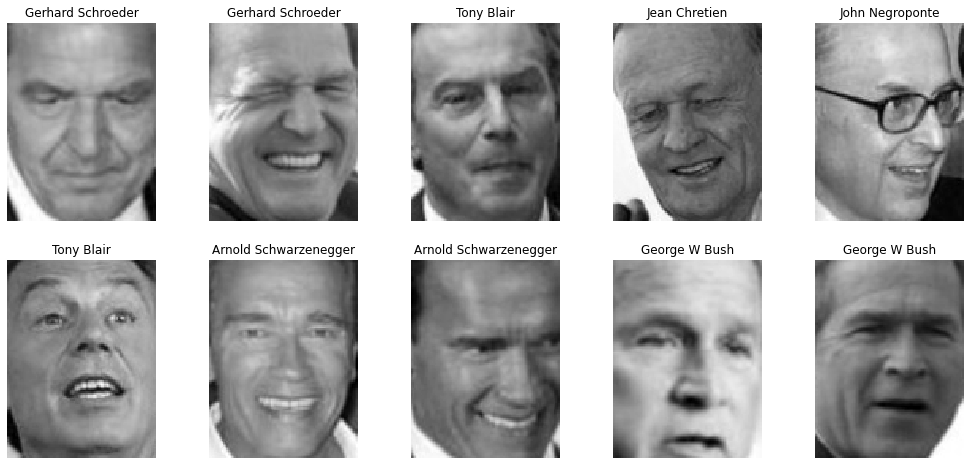

In [87]:
def plot_image_test(ind):
    plt.title(*names[y_test[ind]])
    plt.imshow(255 - X_test[ind].reshape(125, 94), cmap=plt.cm.gray_r, interpolation='nearest')
    
def plot_grid(image_ids, nrows, ncols):
    # функция рисует изображения с id равными image_ids
    # в nrows рядов и ncols столбцов
    fig = plt.gcf()
    fig.set_size_inches(17.5, 8)
    for i, index in enumerate(image_ids):
        plt.subplot(nrows, ncols, i + 1)
        plot_image_test(index)
        plt.axis('off')


plot_grid(errors_ids[:10], nrows=2, ncols=5)